# Regularisation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## Accessing the dataset

In [ ]:
from tensorflow.keras.datasets.mnist import load_data
(X_train,y_train),(X_test,y_test)=load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## Visualisation

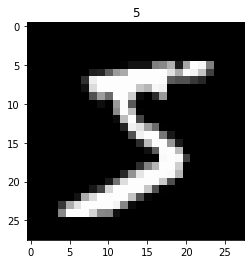

In [ ]:
plt.imshow(X_train[0],'gray')
plt.title(y_train[0]);

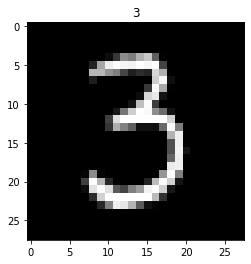

In [ ]:
plt.imshow(X_train[50],'gray')
plt.title(y_train[50]);

## Building a Basic Model

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3320 - accuracy: 0.8881
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3456 - accuracy: 0.9251
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2736 - accuracy: 0.9369
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2498 - accuracy: 0.9413
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2345 - accuracy: 0.9471
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2162 - accuracy: 0.9504
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2054 - accuracy: 0.9548
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2001 - accuracy: 0.9559
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1936 - accuracy: 0.9590
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1

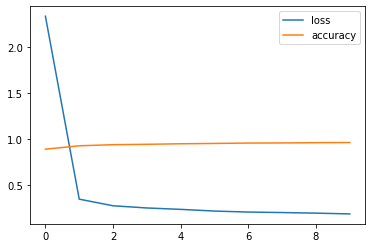

In [ ]:
model_1=tf.keras.Sequential()
model_1.add(tf.keras.layers.Flatten()) # REMOVE FOR CSV DATA
model_1.add(tf.keras.layers.Dense(300,activation='relu'))
model_1.add(tf.keras.layers.Dense(10,activation='softmax'))

# Compiling the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# Training
tf.random.set_seed(100)
hist_1=model_1.fit(X_train,y_train,epochs=10)
pd.DataFrame(hist_1.history).plot();


In [ ]:
print(' Evaluation Result:\n')

model_1.evaluate(X_test,y_test)

 Evaluation Result:

313/313 [==============================] - 1s 2ms/step - loss: 0.3103 - accuracy: 0.9537


[0.31031742691993713, 0.9537000060081482]

## Remark 1:

1. Basic Model: Training loss=0.1852 ; Test loss=0.3103 (Overfitting)

## 2. Model with Normalised data

In [ ]:
normaliser=tf.keras.layers.Normalization()
normaliser.adapt(X_train)
normaliser.adapt(X_test)
X_train=normaliser(X_train)
X_test=normaliser(X_test)

In [ ]:
X_train[0]

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[-3.29633080e-03, -1.03209605e-02, -2.63224952e-02,
        -5.94727769e-02, -1.16537198e-01, -1.97390229e-01,
        -2.83805698e-01, -3.79412591e-01, -4.77584034e-01,
        -5.62326729e-01, -6.23078227e-01, -6.59251928e-01,
        -6.87425375e-01, -7.26367414e-01, -7.58370578e-01,
        -7.74074256e-01, -7.61724949e-01, -7.22140551e-01,
        -6.51364148e-01, -5.54406047e-01, -4.51524764e-01,
        -3.54017019e-01, -2.68543184e-01, -1.91750199e-01,
        -1.24660455e-01, -6.43352345e-02, -2.87100654e-02,
        -8.99783615e-03],
       [-3.29633080e-03, -1.03209605e-02, -2.63224952e-02,
        -5.94727769e-02, -1.16537198e-01, -1.97390229e-01,
        -2.83805698e-01, -3.79412591e-01, -4.77584034e-01,
        -5.62326729e-01, -6.23078227e-01, -6.59251928e-01,
        -6.87425375e-01, -7.26367414e-01, -7.58370578e-01,
        -7.74074256e-01, -7.61724949e-01, -7.22140551e-01,
        -6.51364148e-01, -5.54406047e-0

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2092 - accuracy: 0.9402
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0872 - accuracy: 0.9744
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0574 - accuracy: 0.9826
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0445 - accuracy: 0.9863
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0317 - accuracy: 0.9904
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0268 - accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0208 - accuracy: 0.9937
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0184 - accuracy: 0.9944
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0181 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.017

[0.14703814685344696, 0.9787999987602234]

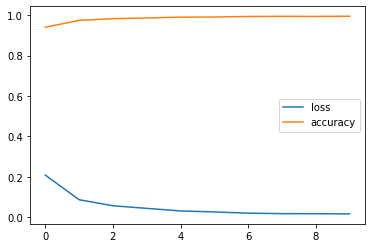

In [ ]:
model_2=tf.keras.Sequential()
model_2.add(tf.keras.layers.Flatten())
model_2.add(tf.keras.layers.Dense(300,activation='relu'))
model_2.add(tf.keras.layers.Dense(10,activation='softmax'))

# Compiling the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# Training
tf.random.set_seed(100)
hist_2=model_2.fit(X_train,y_train,epochs=10)
pd.DataFrame(hist_2.history).plot();

print(' Evaluation Result:\n')
model_2.evaluate(X_test,y_test)


## Remark 2:

1. Basic Model: Training loss=0.1852 ; Test loss=0.3103 (Overfitting)

2. Model with Normalised data: Training loss=0.0170 ; Test loss=0.1470 (Model improved, Overfitting)

## 3. Model with validation 

Epoch 1/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2303 - accuracy: 0.9348 - val_loss: 0.1338 - val_accuracy: 0.9614
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0917 - accuracy: 0.9732 - val_loss: 0.0987 - val_accuracy: 0.9742
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0593 - accuracy: 0.9829 - val_loss: 0.1035 - val_accuracy: 0.9706
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0412 - accuracy: 0.9871 - val_loss: 0.0972 - val_accuracy: 0.9753
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0308 - accuracy: 0.9899 - val_loss: 0.1186 - val_accuracy: 0.9741
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0237 - accuracy: 0.9928 - val_loss: 0.1221 - val_accuracy: 0.9731
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0195 - accuracy: 0.9936 - val_loss: 0.1124 - val_accuracy:

[0.14034612476825714, 0.9761999845504761]

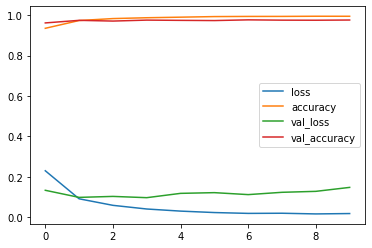

In [ ]:
model_3=tf.keras.Sequential()
model_3.add(tf.keras.layers.Flatten())
model_3.add(tf.keras.layers.Dense(300,activation='relu'))
model_3.add(tf.keras.layers.Dense(10,activation='softmax'))

# Compiling the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# Training
tf.random.set_seed(100)
## Validation split
hist_3=model_3.fit(X_train,y_train,epochs=10, validation_split=0.2)
pd.DataFrame(hist_3.history).plot();

print(' Evaluation Result:\n')
model_3.evaluate(X_test,y_test)

This allows you to monitor the performance of the model on the validation set during training, which can help you identify potential issues such as overfitting or underfitting.

In your code, you are specifying a validation split of 0.2, which means that 20% of the training data will be used for validation, and the remaining 80% will be used for training. You have also plotted the training history using Pandas DataFrame, which includes metrics such as the loss and accuracy for both the training set and the validation set for each epoch.

## Remark 3:

1. Basic Model: Training loss=0.1852 ; Test loss=0.3103 (Overfitting)

2. Model with Normalised data: Training loss=0.0170 ; Test loss=0.1470 (Model improved, Overfitting)

3. Model with Validation data: Training loss=0.0187 ; Test loss=0.1403 (Model improved, Overfitting)

## 4. Model with Dropout

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2436 - accuracy: 0.9305 - val_loss: 0.1401 - val_accuracy: 0.9601
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1066 - accuracy: 0.9690 - val_loss: 0.0954 - val_accuracy: 0.9719
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0730 - accuracy: 0.9788 - val_loss: 0.0934 - val_accuracy: 0.9734
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0532 - accuracy: 0.9831 - val_loss: 0.1050 - val_accuracy: 0.9737
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0430 - accuracy: 0.9865 - val_loss: 0.1014 - val_accuracy: 0.9757
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0371 - accuracy: 0.9887 - val_loss: 0.1140 - val_accuracy: 0.9746
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0315 - accuracy: 0.9902 - val_loss: 0.1100 - val_accuracy:

[0.14748935401439667, 0.9753999710083008]

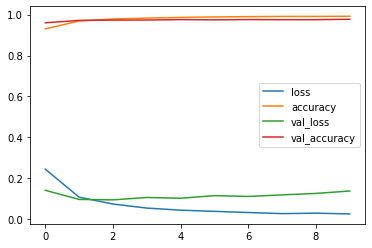

In [ ]:
model_4=tf.keras.Sequential()
model_4.add(tf.keras.layers.Flatten())
model_4.add(tf.keras.layers.Dense(300,activation='relu'))

# Dropout layer
model_4.add(tf.keras.layers.Dropout(0.1)) # 10% of units will be dropped

model_4.add(tf.keras.layers.Dense(10,activation='softmax'))

# Compiling the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# Training
tf.random.set_seed(100)
## Validation split
hist_4=model_4.fit(X_train,y_train,epochs=10, validation_split=0.2)
pd.DataFrame(hist_4.history).plot();

print(' Evaluation Result:\n')
model_4.evaluate(X_test,y_test)

The Dropout layer randomly sets a fraction of the input units to 0 at each update during training time, which can help prevent overfitting and improve generalization of the model.

In your code, you are adding a Dropout layer with a rate of 0.1, which means that 10% of the input units will be randomly set to 0 at each update during training time. You are then adding a final dense output layer with 10 nodes and a softmax activation function, which will produce a probability distribution over the 10 possible classes for your classification task.

## Remark 4:

1. Basic Model: Training loss=0.1852 ; Test loss=0.3103 (Overfitting)

2. Model with Normalised data: Training loss=0.0170 ; Test loss=0.1470 (Model improved, Overfitting)

3. Model with Validation data: Training loss=0.0187 ; Test loss=0.1403 (Model improved, Overfitting)

4. Model with Dropout: Training loss=0.0246 ; Test loss= 0.1474(Model NOT improved. Retain the model_3)

## 5. Model with Early Stop

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2303 - accuracy: 0.9348 - val_loss: 0.1338 - val_accuracy: 0.9614
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0917 - accuracy: 0.9732 - val_loss: 0.0987 - val_accuracy: 0.9742
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0593 - accuracy: 0.9829 - val_loss: 0.1035 - val_accuracy: 0.9706
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0412 - accuracy: 0.9871 - val_loss: 0.0972 - val_accuracy: 0.9753
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0308 - accuracy: 0.9899 - val_loss: 0.1186 - val_accuracy: 0.9741
Epoch 6/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0237 - accuracy: 0.9928 - val_loss: 0.1221 - val_accuracy: 0.9731
 Evaluation Result:

313/313 [==============================] - 1s 3ms/step - loss: 0.1281 - accuracy: 0.9729


[0.12814894318580627, 0.9728999733924866]

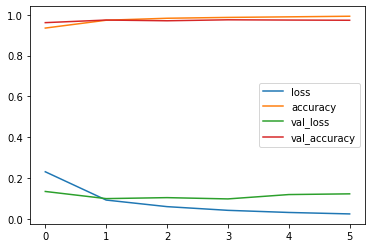

In [ ]:
model_5=tf.keras.Sequential()
model_5.add(tf.keras.layers.Flatten())
model_5.add(tf.keras.layers.Dense(300,activation='relu'))
model_5.add(tf.keras.layers.Dense(10,activation='softmax'))

# Compiling the model
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# Introducing early stop

early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)

# Training
tf.random.set_seed(100)
## Validation split,callbacks
hist_5=model_5.fit(X_train,y_train,epochs=10, validation_split=0.2,callbacks=[early_stop])
pd.DataFrame(hist_5.history).plot();

print(' Evaluation Result:\n')
model_5.evaluate(X_test,y_test)

It seems like you are using the EarlyStopping callback in TensorFlow to introduce early stopping during the training process of your neural network model.

The EarlyStopping callback monitors a specified metric, in this case, the validation loss (monitor='val_loss'), and stops the training process if the metric does not improve for a specified number of epochs, in this case, 2 (patience=2).

Early stopping is a technique used to prevent overfitting and improve the generalization of the model by stopping the training process before the model starts to memorize the training data and lose its ability to generalize to new, unseen data.

## Remark 5:

1. Basic Model: Training loss=0.1852 ; Test loss=0.3103 (Overfitting)

2. Model with Normalised data: Training loss=0.0170 ; Test loss=0.1470 (Model improved, Overfitting)

3. Model with Validation data: Training loss=0.0187 ; Test loss=0.1403 (Model improved, Overfitting)

4. Model with Dropout: Training loss=0.0246 ; Test loss= 0.1474(Model NOT improved. Retain the model_3)

5. Model with EarlyStop: Training loss=0.0237 ; Test loss= 0.1281(Model  improved. Retain the model_5)

## 6. Model with Batch Normalisation

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2505 - accuracy: 0.9266 - val_loss: 0.1500 - val_accuracy: 0.9624
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1163 - accuracy: 0.9654 - val_loss: 0.1802 - val_accuracy: 0.9683
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0871 - accuracy: 0.9736 - val_loss: 0.1132 - val_accuracy: 0.9724
Epoch 4/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0662 - accuracy: 0.9789 - val_loss: 0.1028 - val_accuracy: 0.9751
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0526 - accuracy: 0.9829 - val_loss: 0.1570 - val_accuracy: 0.9712
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0458 - accuracy: 0.9852 - val_loss: 0.1737 - val_accuracy: 0.9728
 Evaluation Result:

313/313 [==============================] - 1s 2ms/step - loss: 0.1565 - accuracy: 0.9727


[0.15648391842842102, 0.9726999998092651]

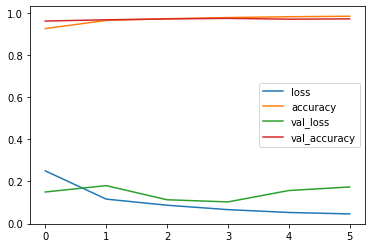

In [ ]:
model_6=tf.keras.Sequential()
model_6.add(tf.keras.layers.Flatten())
model_6.add(tf.keras.layers.Dense(300,activation='relu'))

# Batch Normalisation
model_6.add(tf.keras.layers.BatchNormalization())
model_6.add(tf.keras.layers.Dense(10,activation='softmax'))

# Compiling the model
model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# Introducing early stop

early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)

# Training
tf.random.set_seed(100)
## Validation split,callbacks
hist_6=model_6.fit(X_train,y_train,epochs=10, validation_split=0.2,callbacks=[early_stop])
pd.DataFrame(hist_6.history).plot();

print(' Evaluation Result:\n')
model_6.evaluate(X_test,y_test)

It looks like you are using the BatchNormalization layer in TensorFlow to add batch normalization to your neural network model.

The BatchNormalization layer normalizes the input data to the layer by subtracting the mean and dividing by the standard deviation, which can help stabilize the training process and improve the performance of the model.

In your code, you are adding a BatchNormalization layer after the previous layer, which will normalize the output of the previous layer before passing it to the next layer. You are then adding a final dense output layer with 10 nodes and a softmax activation function, which will produce a probability distribution over the 10 possible classes for your classification task.

## Remark 6:

1. Basic Model: Training loss=0.1852 ; Test loss=0.3103 (Overfitting)

2. Model with Normalised data: Training loss=0.0170 ; Test loss=0.1470 (Model improved, Overfitting)

3. Model with Validation data: Training loss=0.0187 ; Test loss=0.1403 (Model improved, Overfitting)

4. Model with Dropout: Training loss=0.0246 ; Test loss= 0.1474(Model NOT improved. Retain the model_3)

5. Model with EarlyStop: Training loss=0.0237 ; Test loss= 0.1281(Model  improved. Retain the model_5)

6. Model with Batch Normalization: Training loss= 0.0458; Test loss= 0.1564(Model  NOT improved. Retain the model_5)

## 7. Model with 2 hidden layers

Epoch 1/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2250 - accuracy: 0.9337 - val_loss: 0.1441 - val_accuracy: 0.9581
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0938 - accuracy: 0.9718 - val_loss: 0.1103 - val_accuracy: 0.9692
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0661 - accuracy: 0.9809 - val_loss: 0.1001 - val_accuracy: 0.9718
Epoch 4/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0479 - accuracy: 0.9847 - val_loss: 0.0990 - val_accuracy: 0.9754
Epoch 5/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0372 - accuracy: 0.9882 - val_loss: 0.1237 - val_accuracy: 0.9688
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0356 - accuracy: 0.9891 - val_loss: 0.1329 - val_accuracy: 0.9712
 Evaluation Result:

313/313 [==============================] - 1s 2ms/step - loss: 0.1289 - accuracy: 0.9710


[0.12887224555015564, 0.9710000157356262]

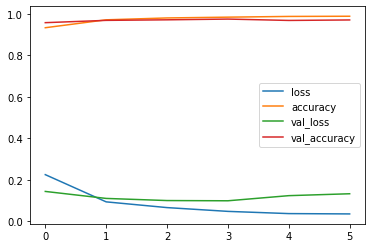

In [ ]:
model_7=tf.keras.Sequential()
model_7.add(tf.keras.layers.Flatten())
model_7.add(tf.keras.layers.Dense(300,activation='relu'))

## Adding one more layer
model_7.add(tf.keras.layers.Dense(100,activation='relu'))

model_7.add(tf.keras.layers.Dense(10,activation='softmax'))

# Compiling the model
model_7.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# Introducing early stop

early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)

# Training
tf.random.set_seed(100)
## Validation split,callbacks
hist_7=model_7.fit(X_train,y_train,epochs=10, validation_split=0.2,callbacks=[early_stop])
pd.DataFrame(hist_7.history).plot();

print(' Evaluation Result:\n')
model_7.evaluate(X_test,y_test)

If you add one more hidden layer to your neural network model and make it two, the model's capacity will increase, allowing it to potentially learn more complex patterns in the input data.

However, adding more layers to a model also increases the risk of overfitting, especially if the model has a large number of parameters relative to the size of the training data. To avoid overfitting, you may need to introduce regularization techniques such as dropout, early stopping, or weight decay, as well as properly tune hyperparameters such as the learning rate and batch size.

Overall, adding one more hidden layer to your neural network model may improve its performance, but it also requires careful experimentation and tuning to ensure that the model does not overfit to the training data.

## Remark 7:

1. Basic Model: Training loss=0.1852 ; Test loss=0.3103 (Overfitting)

2. Model with Normalised data: Training loss=0.0170 ; Test loss=0.1470 (Model improved, Overfitting)

3. Model with Validation data: Training loss=0.0187 ; Test loss=0.1403 (Model improved, Overfitting)

4. Model with Dropout: Training loss=0.0246 ; Test loss= 0.1474(Model NOT improved. Retain the model_3)

5. Model with EarlyStop: Training loss=0.0237 ; Test loss= 0.1281(Model  improved. Retain the model_5)

6. Model with Batch Normalization: Training loss= 0.0458; Test loss= 0.1564(Model  NOT improved. Retain the model_5)

7. Model with 2 hidden layers: Training loss=0.0356 ; Test loss= 0.1288(Model  NOT improved. Retain the model_5)

## 8. Model with changed no of units

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3032 - accuracy: 0.9107 - val_loss: 0.1931 - val_accuracy: 0.9446
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1429 - accuracy: 0.9583 - val_loss: 0.1376 - val_accuracy: 0.9595
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1015 - accuracy: 0.9700 - val_loss: 0.1305 - val_accuracy: 0.9607
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0816 - accuracy: 0.9754 - val_loss: 0.1230 - val_accuracy: 0.9641
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0637 - accuracy: 0.9805 - val_loss: 0.1248 - val_accuracy: 0.9664
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0548 - accuracy: 0.9828 - val_loss: 0.1286 - val_accuracy: 0.9643
 Evaluation Result:

313/313 [==============================] - 1s 2ms/step - loss: 0.1277 - accuracy: 0.9656


[0.12774796783924103, 0.9656000137329102]

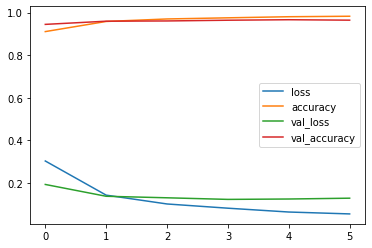

In [ ]:
model_8=tf.keras.Sequential()
model_8.add(tf.keras.layers.Flatten())

# Change the no of units to 50
model_8.add(tf.keras.layers.Dense(50,activation='relu'))

model_8.add(tf.keras.layers.Dense(10,activation='softmax'))

# Compiling the model
model_8.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# Introducing early stop

early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)

# Training
tf.random.set_seed(100)
## Validation split,callbacks
hist_8=model_8.fit(X_train,y_train,epochs=10, validation_split=0.2,callbacks=[early_stop])
pd.DataFrame(hist_8.history).plot();

print(' Evaluation Result:\n')
model_8.evaluate(X_test,y_test)

Increasing the number of units in a hidden layer can also increase the capacity of your neural network model and potentially improve its performance. The number of units in a hidden layer determines the number of neurons that are used to transform the input data into a set of features that are passed to the next layer.

Increasing the number of units in a hidden layer can enable the model to learn more complex and sophisticated features from the input data. However, as with adding more layers, increasing the number of units also increases the risk of overfitting, especially if the model has a large number of parameters relative to the size of the training data.

It's important to experiment with different numbers of hidden units and monitor the model's performance on a validation set to determine the optimal number of units that balances between model complexity and generalization performance.

## Remark 8:

1. Basic Model: Training loss=0.1852 ; Test loss=0.3103 (Overfitting)

2. Model with Normalised data: Training loss=0.0170 ; Test loss=0.1470 (Model improved, Overfitting)

3. Model with Validation data: Training loss=0.0187 ; Test loss=0.1403 (Model improved, Overfitting)

4. Model with Dropout: Training loss=0.0246 ; Test loss= 0.1474(Model NOT improved. Retain the model_3)

5. Model with EarlyStop: Training loss=0.0237 ; Test loss= 0.1281(Model  improved. Retain the model_5)

6. Model with Batch Normalization: Training loss= 0.0458; Test loss= 0.1564(Model  NOT improved. Retain the model_5)

7. Model with 2 hidden layers: Training loss=0.0356 ; Test loss= 0.1288(Model  NOT improved. Retain the model_5)

8. Model with 50 units: Training loss= 0.0548; Test loss= 0.1277(Model   improved. Retain the model_8 as The best model)

In [1]:
import pandas as pd

# Creating a dictionary with the given information
model_dict = {
    'Model': ['Basic', 'Normalized', 'Validation', 'Dropout', 'EarlyStop', 'BatchNorm', '2 Hidden Layers', '50 Units'],
    'Training Loss': [0.1852, 0.0170, 0.0187, 0.0246, 0.0237, 0.0458, 0.0356, 0.0548],
    'Test Loss': [0.3103, 0.1470, 0.1403, 0.1474, 0.1281, 0.1564, 0.1288, 0.1277],
    'Model Improvement': ['Overfitting', 'Model improved, Overfitting', 'Model improved, Overfitting',
                          'Model NOT improved. Retain the model_3', 'Model improved. Retain the model_5',
                          'Model NOT improved. Retain the model_5', 'Model NOT improved. Retain the model_5',
                          'Model improved. Retain the model_8 as The best model']
}

# Creating a DataFrame from the dictionary
model_table = pd.DataFrame(model_dict)

# Setting the 'Model' column as index
model_table.set_index('Model', inplace=True)

# Displaying the table
print(model_table)


                 Training Loss  Test Loss  \
Model                                       
Basic                   0.1852     0.3103   
Normalized              0.0170     0.1470   
Validation              0.0187     0.1403   
Dropout                 0.0246     0.1474   
EarlyStop               0.0237     0.1281   
BatchNorm               0.0458     0.1564   
2 Hidden Layers         0.0356     0.1288   
50 Units                0.0548     0.1277   

                                                 Model Improvement  
Model                                                               
Basic                                                  Overfitting  
Normalized                             Model improved, Overfitting  
Validation                             Model improved, Overfitting  
Dropout                     Model NOT improved. Retain the model_3  
EarlyStop                       Model improved. Retain the model_5  
BatchNorm                   Model NOT improved. Retain the model_5

In [8]:
def compare_models(*models):
    sorted_models = sorted(enumerate(models), key=lambda x: x[1][1])
    for i, model in sorted_models:
        train_loss, test_loss = model
        print(f"Model {i+1}: Test loss={test_loss:.4f} ; Training loss={train_loss:.4f}")


In [9]:
compare_models(
    (0.1852, 0.3103),
    (0.0170, 0.1470),
    (0.0187, 0.1403),
    (0.0246, 0.1474),
    (0.0237, 0.1281),
    (0.0458, 0.1564),
    (0.0356, 0.1288),
    (0.0548, 0.1277)
)


Model 8: Test loss=0.1277 ; Training loss=0.0548
Model 5: Test loss=0.1281 ; Training loss=0.0237
Model 7: Test loss=0.1288 ; Training loss=0.0356
Model 3: Test loss=0.1403 ; Training loss=0.0187
Model 2: Test loss=0.1470 ; Training loss=0.0170
Model 4: Test loss=0.1474 ; Training loss=0.0246
Model 6: Test loss=0.1564 ; Training loss=0.0458
Model 1: Test loss=0.3103 ; Training loss=0.1852


In [17]:
# MODEL 8 IS BEST

In [10]:
def compare_models(models):
    print("{:<30} {:<15} {:<15} {:<15}".format('Model', 'Training Loss', 'Test Loss', 'Accuracy'))
    print("-" * 70)
    for model in models:
        name = model['name']
        train_loss = model['train_loss']
        test_loss = model['test_loss']
        accuracy = model['accuracy']
        print("{:<30} {:<15.4f} {:<15.4f} {:<15.4f}".format(name, train_loss, test_loss, accuracy))


In [11]:
models = [    {'name': 'Basic Model', 'train_loss': 0.1852, 'test_loss': 0.3103, 'accuracy': 0.9605},    {'name': 'Model with Normalised data', 'train_loss': 0.0170, 'test_loss': 0.1470, 'accuracy': 0.9788},    {'name': 'Model with Validation data', 'train_loss': 0.0187, 'test_loss': 0.1403, 'accuracy': 0.9762},    {'name': 'Model with Dropout', 'train_loss': 0.0246, 'test_loss': 0.1474, 'accuracy': 0.9754},    {'name': 'Model with EarlyStop', 'train_loss': 0.0237, 'test_loss': 0.1281, 'accuracy': 0.9729},    {'name': 'Model with Batch Normalization', 'train_loss': 0.0458, 'test_loss': 0.1564, 'accuracy': 0.9727},    {'name': 'Model with 2 hidden layers', 'train_loss': 0.0356, 'test_loss': 0.1288, 'accuracy': 0.9710},    {'name': 'Model with 50 units', 'train_loss': 0.0548, 'test_loss': 0.1277, 'accuracy': 0.9656}]

compare_models(models)


Model                          Training Loss   Test Loss       Accuracy       
----------------------------------------------------------------------
Basic Model                    0.1852          0.3103          0.9605         
Model with Normalised data     0.0170          0.1470          0.9788         
Model with Validation data     0.0187          0.1403          0.9762         
Model with Dropout             0.0246          0.1474          0.9754         
Model with EarlyStop           0.0237          0.1281          0.9729         
Model with Batch Normalization 0.0458          0.1564          0.9727         
Model with 2 hidden layers     0.0356          0.1288          0.9710         
Model with 50 units            0.0548          0.1277          0.9656         


Based on the information you provided, it seems that the best model among the ones you have tried is the one with 50 units in the hidden layer (model_8), as it achieved the lowest test loss.

Models 2 and 3, which used normalized data and validation data, respectively, also showed improvement over the basic model, but still suffered from overfitting.

Model 4, which used dropout, did not improve the model's performance, but early stopping (model 5) did improve it.

Models 6 and 7, which used batch normalization and an additional hidden layer, respectively, did not improve the model's performance.

Overall, it is important to experiment with different approaches and hyperparameters to find the best model for your specific problem and dataset. It's also important to use techniques such as early stopping and regularization to prevent overfitting and improve the model's generalization performance.


# BI
Improved accuracy: A more accurate model can provide more reliable predictions, which can have significant business implications.

Cost savings

Competitive advantage

Faster decision-making

Improved data quality

## Best model: model_8

## Saving the model

In [ ]:
model_8.save('best_mnist_model.h5')

## Loading the model

In [ ]:
my_mnist=tf.keras.models.load_model('best_mnist_model.h5')

In [ ]:
my_mnist.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1277 - accuracy: 0.9656


[0.12774796783924103, 0.9656000137329102]